In [1]:
import statsmodels.api as sm
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline

#### 1 - D

In [2]:
a = norm.rvs(3,1, size=10000)
b = norm.rvs(8,2,size=10000)

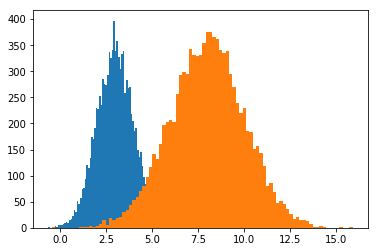

In [3]:
plt.hist(a, bins=90)
plt.hist(b, bins=90)
plt.show()

In [4]:
all_points = np.concatenate((a,b), axis=0)

In [5]:
all_points

array([ 1.86980254,  3.68098571,  2.53416167, ...,  8.35723502,
        8.53965762,  7.9130798 ])

Assume some values of parameters. Remember p1 and p2 are also parameters.  

In [6]:
u1, u2 = 1,6
s1, s2 = 5,1
p1, p2 = 0.4,0.6

In [7]:
u1_ary, u2_ary, s1_ary, s2_ary, p1_ary, p2_ary = [], [], [], [], [], []
for i in range(50):

    u1_ary.append(u1)
    u2_ary.append(u2)
    s1_ary.append(s1)
    s2_ary.append(s2)
    p1_ary.append(p1)
    p2_ary.append(p2)
    
    # Step 1 : Calculate Responsibilities (E step)

    r1 = norm.pdf(all_points, u1, s1)
    r2 = norm.pdf(all_points, u2, s2)
    n = [r1[i] + r2[i] for i in range(len(r1))]
    r1n = np.divide(r1, n)
    r2n = np.divide(r2, n)
    
    r1_total = np.sum(r1n)
    r2_total = np.sum(r2n)
    total = r1_total + r2_total
    
    # Step 2 : Calculate parameters (M step)
    
    p1, p2 = r1_total/total, r2_total/total
    
    u1 = np.sum(np.multiply(r1n,all_points))/r1_total
    u2 = np.sum(np.multiply(r2n, all_points))/r2_total
    
    diff1 = np.subtract(all_points, u1)
    diff2 = np.subtract(all_points, u2)

    s1 = np.sum(np.multiply(np.multiply(r1n, diff1), diff1))/r1_total
    s2 = np.sum(np.multiply(np.multiply(r2n, diff2), diff2))/r2_total
    
    s1, s2 = np.sqrt(s1), np.sqrt(s2)

In [8]:
print u1, u2, s1, s2, p1, p2

2.98823379423 8.021551023 1.00153363526 1.99306444499 0.502775036663 0.497224963337


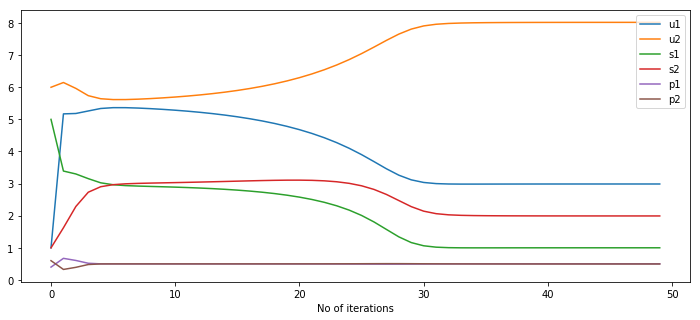

In [9]:
plt.figure(figsize=(12,5))
plt.plot(u1_ary, label = 'u1')
plt.plot(u2_ary, label = 'u2')
plt.plot(s1_ary, label = 's1')
plt.plot(s2_ary, label = 's2')
plt.plot(p1_ary, label = 'p1')
plt.plot(p2_ary, label = 'p2')
plt.xlabel("No of iterations")
plt.legend()
plt.show()

Different Initialization

8.02160234729 2.9882516698 1.99302629736 1.00154629678 0.497218107644 0.502781892356


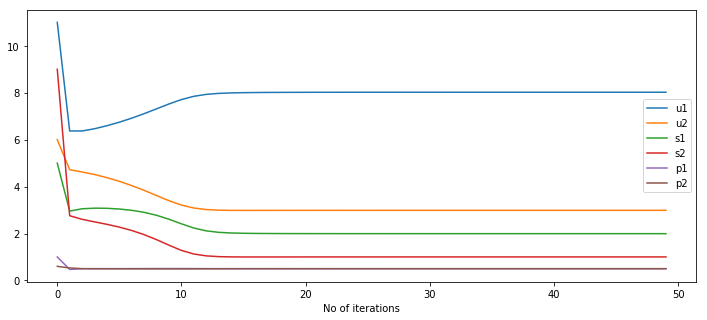

In [10]:
u1, u2 = 11,6
s1, s2 = 5,9
p1, p2 = 1,0.6

u1_ary, u2_ary, s1_ary, s2_ary, p1_ary, p2_ary = [], [], [], [], [], []
for i in range(50):

    u1_ary.append(u1)
    u2_ary.append(u2)
    s1_ary.append(s1)
    s2_ary.append(s2)
    p1_ary.append(p1)
    p2_ary.append(p2)
    
    # Step 1 : Calculate Responsibilities (E step)

    r1 = norm.pdf(all_points, u1, s1)
    r2 = norm.pdf(all_points, u2, s2)
    n = [r1[i] + r2[i] for i in range(len(r1))]
    r1n = np.divide(r1, n)
    r2n = np.divide(r2, n)
    
    r1_total = np.sum(r1n)
    r2_total = np.sum(r2n)
    total = r1_total + r2_total
    
    # Step 2 : Calculate parameters (M step)
    
    p1, p2 = r1_total/total, r2_total/total
    
    u1 = np.sum(np.multiply(r1n,all_points))/r1_total
    u2 = np.sum(np.multiply(r2n, all_points))/r2_total
    
    diff1 = np.subtract(all_points, u1)
    diff2 = np.subtract(all_points, u2)

    s1 = np.sum(np.multiply(np.multiply(r1n, diff1), diff1))/r1_total
    s2 = np.sum(np.multiply(np.multiply(r2n, diff2), diff2))/r2_total
    
    s1, s2 = np.sqrt(s1), np.sqrt(s2)
    
print u1, u2, s1, s2, p1, p2

plt.figure(figsize=(12,5))
plt.plot(u1_ary, label = 'u1')
plt.plot(u2_ary, label = 'u2')
plt.plot(s1_ary, label = 's1')
plt.plot(s2_ary, label = 's2')
plt.plot(p1_ary, label = 'p1')
plt.plot(p2_ary, label = 'p2')
plt.xlabel("No of iterations")
plt.legend()
plt.show()